In [2]:
%pylab inline
import os

POPS = [   "ACB", "ASW", "ESN", "GWD", "LWK", "MSL", "YRI", \
           "CLM", "MXL", "PEL", "PUR", \
           "CDX", "CHB", "CHS", "JPT", "KHV", \
           "CEU", "FIN", "GBR", "IBS", "TSI", \
           "BEB", "GIH", "ITU", "PJL", "STU"]

# Load config information
#OUTDIR = os.environ["1KGOUTDIR"]
OUTDIR="/storage/mgymrek/1000Genomes/qc"

Populating the interactive namespace from numpy and matplotlib


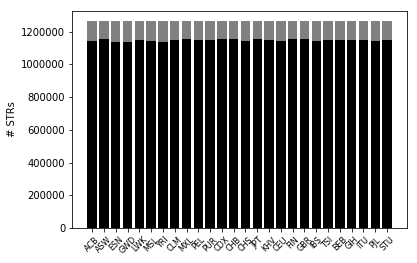

In [12]:
# Num calls by period

numcalls = []
numpass = []
for pop in POPS:
    fname = os.path.join(OUTDIR, pop, "%s.stats.txt"%pop)
    nc = 0
    np = 0
    if os.path.exists(fname):
        nc, np = [int(item.strip()) for item in open(fname, "r").readlines()]
    numcalls.append(nc)
    numpass.append(np)

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_yscale("log")
ax.bar(range(len(POPS)), numcalls, color="gray")
ax.bar(range(len(POPS)), numpass, color="black");
ax.set_xlabel("")
ax.set_xticks(range(len(POPS)))
ax.set_xticklabels(POPS, rotation=45, size=8)
ax.set_ylabel("# STRs");

,period,numtrios,num_consistent,num_inf_consistent,num_inconsistent,mi_all,mi_inf
0,1,247821736,241248833,148877585,6572903,0.973477,0.957717
1,2,88559027,85398443,37984253,3160584,0.964311,0.923184
2,3,78401249,77999988,6776094,401261,0.994882,0.944093
3,4,199269224,198276937,16757153,992287,0.995020,0.944095
4,5,54256959,53988499,4121548,268460,0.995052,0.938847
5,6,14129824,14068171,934447,61653,0.995637,0.938106


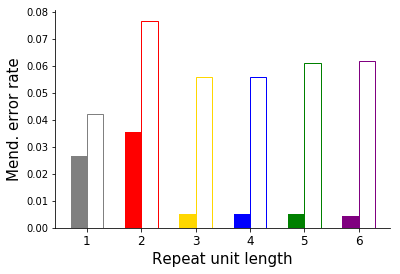

In [22]:
# MI by period combined

import pandas as pd
mend = pd.read_csv(os.path.join(OUTDIR, "mend.txt"), sep="\t")

PERCOLORS = ["gray","red","gold","blue","green","purple"]
w=0.3
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(range(mend.shape[0]), 1-mend["mi_all"], color=PERCOLORS, width=w)
ax.bar([item+w for item in range(mend.shape[0])], 1-mend["mi_inf"], color="white", edgecolor=PERCOLORS, width=w)
ax.set_xticks([item+w/2 for item in range(mend.shape[0])])
ax.set_xticklabels(range(1, 7), size=12)
ax.set_ylabel("Mend. error rate", size=15)
ax.set_xlabel("Repeat unit length", size=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
mend

In [ ]:
# Num common alleles by pop - TODO